# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [191]:
import numpy as np
import matplotlib as plt
%matplotlib inline

In [192]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [193]:
mnist['data'].size

54880000

In [194]:
mnist['target'].size

70000

In [195]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Now take a look at the shapes of the X and y matricies 

In [196]:
X, y = mnist['data'], mnist['target']

In [197]:
X.shape

(70000, 784)

In [198]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [199]:
print('y: ',y[36000])

y:  9


### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

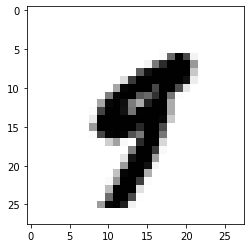

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[36000].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")

In [201]:
matplotlib.__version__

'3.3.2'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [212]:
X_train = X[:60000]
X_test= X[60000:]

y_train = y[:60000]
y_test = y[60000:]

y_train.shape
y_test.shape

(10000,)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [203]:
y_train = np.where(y_train == '5',1,0)
y_test = np.where(y_test == '5',1,0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [204]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [205]:
predict_y = model.predict(X_test)

### Does the classifier predict correctly the 36000th digit we picked before?

In [206]:
predict_y_36000 = model.predict(X_train[36000].reshape(1,-1))
predict_y_36000

#As it was a 9, different than 5 thus 0 is correct.

array([0])

In [207]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y)

array([[9034,   74],
       [ 147,  745]])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [208]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [209]:
model_Never5Classifier = Never5Classifier().fit(X_train)

In [213]:
predict_y_neverclassify = model_Never5Classifier.predict(X_test)


AttributeError: 'NoneType' object has no attribute 'predict'

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [215]:
confusion_matrix(y_test, predict_y)

ValueError: Mix of label input types (string and number)

In [214]:
confusion_matrix(y_test, predict_y_neverclassify)

ValueError: Mix of label input types (string and number)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?